# 🧠 Introduction to Convolutional Neural Networks (CNNs)

In this lesson, we’ll understand **how Convolutional Neural Networks (CNNs)** work, why they’re so effective for **image data**, and how they compare to simple **Artificial Neural Networks (ANNs)**.

CNNs are the foundation of **computer vision**, powering applications like object detection, face recognition, and even self-driving cars 🚗. They learn to identify **features like edges, shapes, and patterns** automatically from images.

## 🧩 Why CNNs?

Regular ANNs take in the raw pixel values of images. This means each pixel is treated independently, and spatial relationships (like how nearby pixels form shapes) are lost.

CNNs solve this by applying **filters (or kernels)** that scan across the image to detect features like edges or corners. As we go deeper, CNNs combine these features to recognize more complex patterns like digits or clothes.

## 📸 Visualizing How Filters Work

Filters slide across an image, multiplying and summing pixel values. Each filter detects a particular pattern. For example, one filter might detect vertical edges while another detects horizontal edges.

Let’s visualize this using an image and a few example filters.

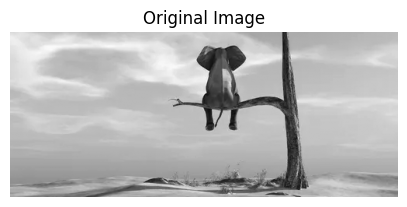

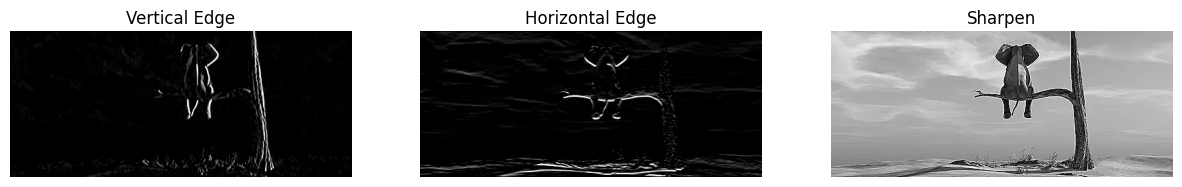

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image (already in grayscale for simplicity)
img = cv2.imread('image.webp', 0)

plt.figure(figsize=(5,5))
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

# Define filters
filters = {
    'Vertical Edge': np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]),
    'Horizontal Edge': np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]]),
    'Sharpen': np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
}

fig, axes = plt.subplots(1, 3, figsize=(15,5))
for i, (name, f) in enumerate(filters.items()):
    filtered = cv2.filter2D(img, -1, f)
    axes[i].imshow(filtered, cmap='gray')
    axes[i].set_title(name)
    axes[i].axis('off')
plt.show()

As you can see, filters extract different **features** from the same image. CNNs learn these filters automatically during training instead of us defining them manually!

# 🧮 Building an ANN vs CNN for Image Classification

To see why CNNs work better for images, we’ll first build a **simple ANN** and then a **CNN** on the same dataset — MNIST (handwritten digits).

## 🔢 Step 1: Load the MNIST Dataset

MNIST contains 70,000 grayscale images of handwritten digits (0–9). Each image is **28x28 pixels**. We’ll split them into training and testing sets.

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


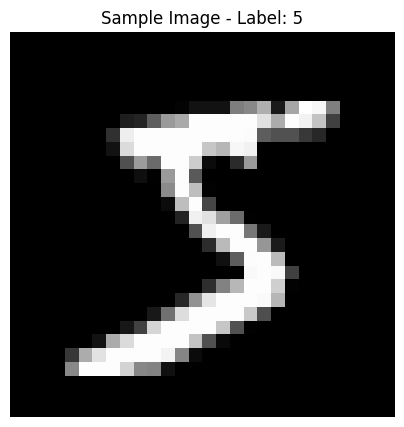

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize and reshape
X_train = X_train / 255.0
X_test = X_test / 255.0

plt.figure(figsize=(5,5))
plt.imshow(X_train[0], cmap='gray')
plt.title(f"Sample Image - Label: {y_train[0]}")
plt.axis('off')
plt.show()

# One-hot encode labels
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

## 🧠 Step 2: Build a Simple ANN

Here, we’ll flatten the image into a 784-element vector (since 28x28 = 784) and feed it into a dense neural network.

Note that flattening **loses spatial structure** — the network no longer knows that pixel (1,1) is next to pixel (1,2).

In [ ]:
from tensorflow.keras import models, layers

ann = models.Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

ann.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_ann = ann.fit(X_train, y_train_cat, epochs=5, validation_data=(X_test, y_test_cat))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8789 - loss: 0.4276 - val_accuracy: 0.9578 - val_loss: 0.1420
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9635 - loss: 0.1265 - val_accuracy: 0.9675 - val_loss: 0.1093
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9767 - loss: 0.0801 - val_accuracy: 0.9747 - val_loss: 0.0829
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9830 - loss: 0.0582 - val_accuracy: 0.9754 - val_loss: 0.0806
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9876 - loss: 0.0417 - val_accuracy: 0.9758 - val_loss: 0.0818


## 📊 Step 3: Evaluate ANN Performance

The ANN does reasonably well but doesn’t take advantage of the spatial structure in the image.

In [ ]:
test_loss, test_acc = ann.evaluate(X_test, y_test_cat)
print(f"Test accuracy (ANN): {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9720 - loss: 0.0946
Test accuracy (ANN): 0.9758


## 🧱 Step 4: Build a CNN

Now we’ll use **convolutional layers** that scan the image using filters, helping the model learn edges and patterns.

After the convolution, **pooling layers** reduce the size of the feature maps, making the model faster and reducing overfitting.

Finally, we flatten the data and pass it through dense layers for classification.

In [ ]:
# Reshape data for CNN input (add channel dimension)
X_train_cnn = X_train.reshape(-1, 28, 28, 1)
X_test_cnn = X_test.reshape(-1, 28, 28, 1)

cnn = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_cnn = cnn.fit(X_train_cnn, y_train_cat, epochs=5, validation_data=(X_test_cnn, y_test_cat))

Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 16ms/step - accuracy: 0.8967 - loss: 0.3368 - val_accuracy: 0.9842 - val_loss: 0.0462
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9852 - loss: 0.0482 - val_accuracy: 0.9852 - val_loss: 0.0448
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 17ms/step - accuracy: 0.9902 - loss: 0.0318 - val_accuracy: 0.9898 - val_loss: 0.0330
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9932 - loss: 0.0215 - val_accuracy: 0.9901 - val_loss: 0.0332
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9945 - loss: 0.0172 - val_accuracy: 0.9834 - val_loss: 0.0508


## 📈 Step 5: Evaluate CNN Performance

CNNs usually perform much better because they preserve spatial patterns and learn hierarchical features automatically.

In [ ]:
test_loss, test_acc = cnn.evaluate(X_test_cnn, y_test_cat)
print(f"Test accuracy (CNN): {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9802 - loss: 0.0599
Test accuracy (CNN): 0.9834


## 🧥 Step 6: CNN vs ANN on Fashion-MNIST

Now let’s repeat the same experiment on the **Fashion-MNIST dataset**, which contains 10 classes of clothing images (like shirts, shoes, and bags).

This dataset is more complex than MNIST, so CNNs will really shine here!

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

(X_train_f, y_train_f), (X_test_f, y_test_f) = fashion_mnist.load_data()

X_train_f = X_train_f / 255.0
X_test_f = X_test_f / 255.0

y_train_f_cat = to_categorical(y_train_f)
y_test_f_cat = to_categorical(y_test_f)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


### 🧠 ANN on Fashion-MNIST

In [ ]:
ann_f = models.Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])
ann_f.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
ann_f.fit(X_train_f, y_train_f_cat, epochs=5, validation_data=(X_test_f, y_test_f_cat))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7813 - loss: 0.6294 - val_accuracy: 0.8479 - val_loss: 0.4364
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8600 - loss: 0.3841 - val_accuracy: 0.8579 - val_loss: 0.3922
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8768 - loss: 0.3362 - val_accuracy: 0.8690 - val_loss: 0.3627
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8868 - loss: 0.3089 - val_accuracy: 0.8701 - val_loss: 0.3555
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8917 - loss: 0.2937 - val_accuracy: 0.8713 - val_loss: 0.3610


In [ ]:
test_loss_f_ann, test_acc_f_ann = ann_f.evaluate(X_test_f, y_test_f_cat)
print(f"Test accuracy (ANN on Fashion-MNIST): {test_acc_f_ann:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8713 - loss: 0.3562
Test accuracy (ANN on Fashion-MNIST): 0.8713


### 🧱 CNN on Fashion-MNIST

In [ ]:
X_train_f_cnn = X_train_f.reshape(-1, 28, 28, 1)
X_test_f_cnn = X_test_f.reshape(-1, 28, 28, 1)

cnn_f = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn_f.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn_f.fit(X_train_f_cnn, y_train_f_cat, epochs=10, validation_data=(X_test_f_cnn, y_test_f_cat))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 17ms/step - accuracy: 0.7643 - loss: 0.6535 - val_accuracy: 0.8652 - val_loss: 0.3669
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.8850 - loss: 0.3206 - val_accuracy: 0.8872 - val_loss: 0.3149
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9012 - loss: 0.2688 - val_accuracy: 0.8950 - val_loss: 0.2917
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.9133 - loss: 0.2337 - val_accuracy: 0.8949 - val_loss: 0.2836
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.9223 - loss: 0.2070 - val_accuracy: 0.9061 - val_loss: 0.2558
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 17ms/step - accuracy: 0.9296 - loss: 0.1895 - val_accuracy: 0.9048 - val_loss: 0.2615
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 17ms/step - accuracy: 0.9357 - loss: 0.1730 - val_accuracy: 0.9026 - val_loss: 0.2908
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9444 -

In [ ]:
test_loss_f_cnn, test_acc_f_cnn = cnn_f.evaluate(X_test_f_cnn, y_test_f_cat)
print(f"Test accuracy (CNN on Fashion-MNIST): {test_acc_f_cnn:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9016 - loss: 0.3055
Test accuracy (CNN on Fashion-MNIST): 0.9026


# ✅ Summary

- **ANNs** treat each pixel independently and ignore spatial patterns.
- **CNNs** preserve spatial relationships and learn hierarchical features.
- Convolutional layers extract edges and patterns, pooling layers reduce size, and dense layers make the final decision.
- On both **MNIST** and **Fashion-MNIST**, CNNs outperform ANNs because they understand how pixels relate to one another.